# Analyzing safety of neighboorhood in Pittsburgh through Arrest Data - Eric Liu

## Introduction
Our team's main metric is safety so we picked submetrics like housing market and economy, education, public safety and justice, and human/social services. My metric is safety and justice in the neighborhoods of Pittsburgh. This analysis is flawed in the sense that there is no arrest rate per population. I tried looking for an accurate population dataset but there weren't any. Nor was there any up to date data on the population of many of these neighborhoods on google. 

## The metric: Safety and Justice
This metric is a critical aspect of evaluating neighborhood safety, emphasizing the idea that communities with fewer arrests are typically safer. A low number of arrests may indicate less criminal activity, stronger community ties, and effective preventative measures, such as social programs and education. On the other hand, neighborhoods with higher arrest rates could reflect underlying challenges, such as poverty, social instability, or systemic issues that may contribute to crime.

## Steps I'm taking
* Decrease the amount of data I need to look through.
    * This includes filtering out:
        * Data points before 2021 (We want timely data).
* Create a dictionary in python documenting which neighborhood had how many crimes.
* Create graphs/charts to visually look at the # of crimes in each neighborhood.
* Find top 25 percentile of least arrest neighborhood cities and compare with other submetrics. 

## Step 1 - Creating New CSV with proper data

In [219]:
import pandas as pd
arrests = pd.read_csv("Arrest_data.csv")

# Converts arresttime to string to later filter out any arrests before 2021.
arrests['ARRESTTIME'] = arrests['ARRESTTIME'].astype(str)
query_mask = arrests[arrests['ARRESTTIME'].str[:4].astype(int) >= 2021]

query_mask.to_csv("filtered_arrests.csv", index = False)

In [221]:
query_mask.head(10)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
45715,56724,2033663,20237889,23.0,M,W,2021-01-01T18:55:00,"600 Block 1st AV Pittsburgh, PA 15219",1543 Driving While Operating Privilege is Susp...,"4700 Block Butler ST Pittsburgh, PA 15201",Central Lawrenceville,2,901.0,7.0,2.0,-79.957848,40.474130
45722,56731,2033670,19153578,39.0,F,B,2021-01-01T17:59:00,"2nd AV & W Elizabeth ST Pittsburgh, PA 15207",2701 Simple Assault. / 2709 Harassment (Non-Sp...,"700 Block Johnston AV Pittsburgh, PA 15207",Glen Hazel,4,1504.0,5.0,3.0,-79.933739,40.405610
45724,56733,2033672,19250513,23.0,M,B,2021-01-01T05:21:00,"900 Block Second AV Pittsburgh, PA 15219",9015 Failure To Appear/Arrest on Attachment Order,"200 Block Lamar ST Pittsburgh, PA 15214",Northview Heights,1,2609.0,1.0,1.0,-80.002533,40.473917
45737,56746,2033685,20152523,49.0,M,B,2021-01-01T03:45:00,"900 Block Second AV Pittsburgh, PA 15219","2701(a)(1) Simple Assault - Intent., Know., Re...","3300 Block Hamlet ST Pittsburgh, PA 15213",South Oakland,4,409.0,6.0,3.0,-79.962833,40.435732
45741,56750,2033689,20173108,28.0,M,B,2021-01-01T06:33:00,"1800 Block Belleau ST Pittsburgh, PA 15214",3503.B1I DEF. TRESPASS ACTUAL COMMUNICATION,"1800 Block Belleau ST Pittsburgh, PA 15214",Fineview,1,2509.0,6.0,1.0,-80.006808,40.461905
45774,56797,2033730,20126213,19.0,F,B,2021-01-08T18:53:00,"2500 Block Brownsville RD Pittsburgh, PA 15210",2701 Simple Assault. / 2718(a)(1) Strangulatio...,"2600 Block Brownsville RD Pittsburgh, PA 15227",Carrick,3,2904.0,4.0,3.0,-79.978804,40.385450
45775,56798,2033731,20131277,45.0,F,B,2021-01-08T07:00:00,"900 Block Second AV Pittsburgh, PA 15219",4304(a)(1) Endangering Welfare of Children.,"3100 Block Shadeland AV Pittsburgh, PA 15212",Marshall-Shadeland,1,2715.0,1.0,1.0,-80.031433,40.473338
45776,56799,2033732,20131277,50.0,M,B,2021-01-08T07:00:00,"900 Block Second AV Pittsburgh, PA 15219",4304(a)(1) Endangering Welfare of Children.,"3100 Block Shadeland AV Pittsburgh, PA 15212",Marshall-Shadeland,1,2715.0,1.0,1.0,-80.031433,40.473338
45777,56800,2033733,20160910,19.0,M,B,2021-01-07T20:40:00,"Halket ST & Louisa ST Pittsburgh, PA 15213",2701 Simple Assault. / 3304 Criminal Mischief.,"3000 Block Vancroft ST Pittsburgh, PA 15219",Upper Hill,2,506.0,6.0,3.0,-79.965157,40.450535
45778,56801,2033734,20199533,32.0,M,B,2021-01-08T05:27:00,"900 Block 2nd AV Pittsburgh, PA 15219",2701 Simple Assault. / 2709 Harassment (Non-Sp...,"10th St BRDG Pittsburgh, PA 15203",South Side Flats,3,1702.0,NaN,NaN,NaN,NaN


## Step 2&3 - Creating a dictionary of # of crimes in each neighborhood & plotting results



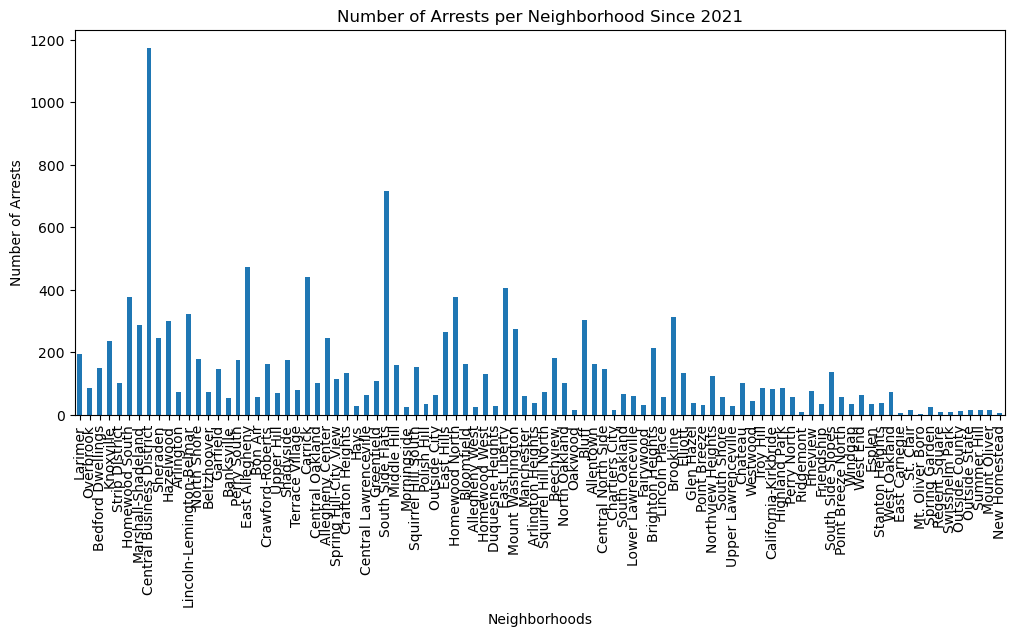

In [110]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

filtered = pd.read_csv("filtered_arrests.csv")
narr = {}
for index, row in filtered.iterrows():
    neighborhood = row["INCIDENTNEIGHBORHOOD"]
    if pd.notna(neighborhood): 
        if neighborhood in narr:
            narr[neighborhood] += 1
        else:
            narr[neighborhood] = 1


# Plotting Arrests per neighborhood
neighborhoodarrests = pd.Series(narr)
neighborhoodarrests.plot(kind='bar', figsize=(12, 5))

plt.title("Number of Arrests per Neighborhood Since 2021")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Arrests")
plt.show()

## Step 4 - Creating Top 10 List of Safest Neighborhoods

In [213]:
df = pd.DataFrame({
    "Name": list(narr.keys()),
    "Count": list(narr.values())
})

from IPython.display import display
display(df)

,Name,Count
0,Larimer,193
1,Overbrook,86
2,Bedford Dwellings,149
3,Knoxville,237
4,Strip District,102
...,...,...
89,Outside County,11
90,Outside State,15
91,Summer Hill,15
92,Mount Oliver,16


In [187]:
#Best neighborhoods are under 33, 25th percentile for safest neighborhoods.
sortedNeighborhoodArrests.Count.describe()

count      94.000000
mean      134.148936
std       164.912551
min         1.000000
25%        33.000000
50%        78.000000
75%       162.000000
max      1173.000000
Name: Count, dtype: float64

In [224]:
sortedNeighborhoodArrests = df.sort_values("Count", ascending=True)
sortedNeighborhoodArrests.head(25)

,Name,Count
85,Mt. Oliver Boro,1
93,New Homestead,4
83,East Carnegie,5
87,Regent Square,9
73,Ridgemont,9
88,Swisshelm Park,10
89,Outside County,11
84,St. Clair,14
50,Oakwood,14
91,Summer Hill,15


## Conclusion
As shown above, we have our top 23 neighborhoods (excluding outside state & outside county). All of these neighborhoods have under 33 arrests in the past 3 years being under the 25th percentile for amount of arrests.  
With the least amount of arrests, Mount Oliver - Borough is the safest neighborhood in Pittsburgh.